In [1]:
import json
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Do smokers have higher insurance charges than non-smokers?

Null Hypothesis H0

Smokers do not have higher insurance

Alternative Hypothesis H1

Smokers have significantly different levels of insurance charges than non

In [3]:
df = df.dropna(subset=['smoker','charges'])

In [4]:
ids = list(range(0,df.shape[0]))
df['id'] = ids
df = df.set_index('id')
df.head()

,age,sex,bmi,children,smoker,region,charges
id,,,,,,,
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
needed_cols = ['smoker','charges']
df[needed_cols]

,smoker,charges
id,,
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520
...,...,...
1333,no,10600.54830
1334,no,2205.98080
1335,no,1629.83350


In [8]:
sm_df = df.loc[ df['smoker']=='yes', needed_cols]
nsm_df = df.loc[ df['smoker']=='no', needed_cols]

In [10]:
sm_group = sm_df['charges']
nsm_group = nsm_df['charges']
sm_group

id
0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [13]:
result = stats.normaltest(sm_group)
alpha = .05

if result.pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected. \nData does not come from a normal distribution.")
else:
    print("The null hypothesis cannot be rejected. \nData comes from a normal distribution")

The null hypothesis can be rejected. 
Data does not come from a normal distribution.


In [14]:
result = stats.normaltest(nsm_group)
alpha = .05

if result.pvalue < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected. \nData does not come from a normal distribution.")
else:
    print("The null hypothesis cannot be rejected. \nData comes from a normal distribution")


The null hypothesis can be rejected. 
Data does not come from a normal distribution.


In [15]:
result = stats.levene(sm_group, nsm_group)
print(result)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)


In [16]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


The groups do not have and normal distribution and do not have equal variance we will use a T test

In [17]:
result = stats.ttest_ind(sm_group, nsm_group, equal_var=False)
print(result)


Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)


In [18]:
alpha = 0.05
if result.pvalue < alpha: 
    print("The null hypothesis can be rejected. \nMedical insurance of smokers is significantly different from non-smokers.")
else:
    print("The null hypothesis cannot be rejected. \nMedical insurance of smokers is **NOT** significantly different from non-smokers")

The null hypothesis can be rejected. 
Medical insurance of smokers is significantly different from non-smokers.


<AxesSubplot: xlabel='smoker', ylabel='charges'>

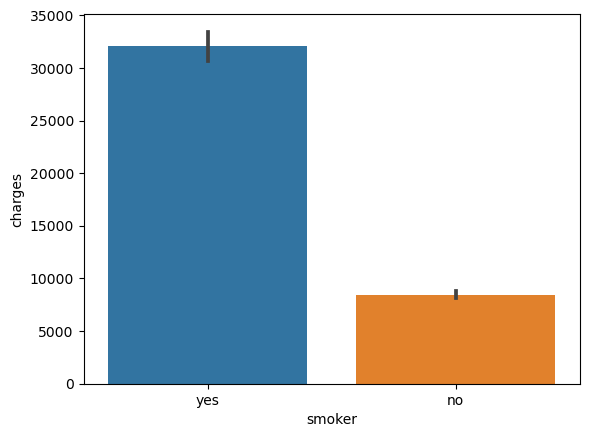

In [19]:
sns.barplot(data=df[needed_cols], y='charges',x='smoker')

from this graph we can see that there is a significant difference in charges between smokers and nonsmokers we may reject H0

Are Men more likely to smoke than women?

Null Hypothesis

Men are not more likely to smoke than women. H0

Alternative Hypothesis

Men have a significantly different chance of (higher) to smoke than women.H1

we will use a Chi square test to test the hypothesis


In [20]:
df = df.dropna(subset=['smoker','sex'])

In [21]:
needed_cols = ['smoker','sex']
df[needed_cols]

,smoker,sex
id,,
0,yes,female
1,no,male
2,no,male
3,no,male
4,no,male
...,...,...
1333,no,male
1334,no,female
1335,no,female


In [22]:
female_df = df.loc[ df['sex']=='female', needed_cols]
male_df = df.loc[ df['sex']=='male', needed_cols]

In [23]:
plot_df =  pd.concat([female_df,male_df])
plot_df

,smoker,sex
id,,
0,yes,female
5,no,female
6,no,female
7,no,female
9,no,female
...,...,...
1324,no,male
1325,no,male
1327,no,male


In [27]:
table = pd.crosstab(plot_df['sex'], plot_df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [29]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [30]:
alpha = 0.05
if p < alpha:  # null hypothesis:
    print("The null hypothesis can be rejected. \nThe number of male smokers is significantly different from female.")
else:
    print("The null hypothesis cannot be rejected. \nThere is no significant difference in the number of smokers between male and female.")

The null hypothesis can be rejected. 
The number of male smokers is significantly different from female.


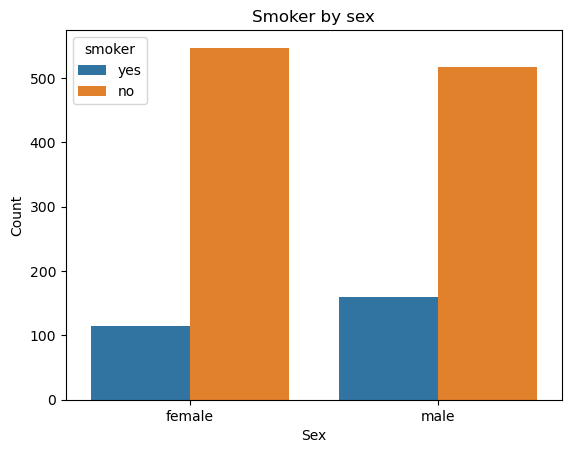

In [31]:
ax = sns.countplot(data=plot_df, x='sex',hue='smoker',)
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title("Smoker by sex");

we can reject the null hypothesis the number of male smokers is higher than that of females

Do different regions have different charges, on average?

Null Hypothesis

Different regions do not have different charges on average H0

Alternative Hypothesis

Insurance charges are different across regions H1

We shall use an ANOVA test

In [32]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
df = df.dropna(subset=['charges','region'])

In [34]:
needed_cols = ['charges','region']
plot_df = df[needed_cols]
plot_df.head()

,charges,region
id,,
0,16884.92400,southwest
1,1725.55230,southeast
2,4449.46200,southeast
3,21984.47061,northwest
4,3866.85520,northwest


In [36]:
groups ={}

for sector in df['region'].unique():
    temp = df.loc[df['region']== sector, 'charges']
    groups[sector] = temp

groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [38]:
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)

    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}

norm_results_df = pd.DataFrame(norm_results).T


norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [37]:
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)


In [40]:

if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


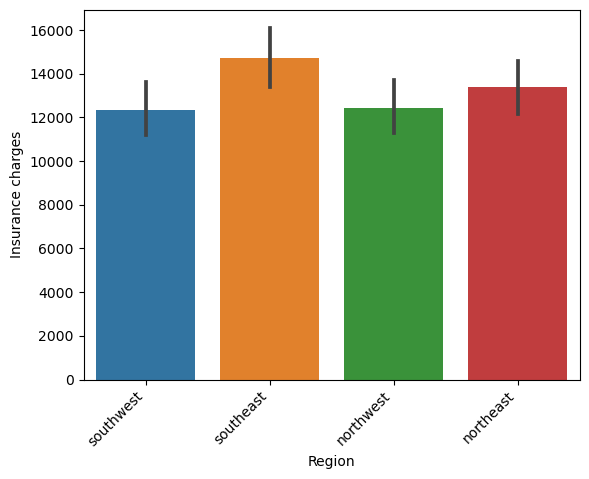

In [41]:
ax = sns.barplot(data=df, x='region', y='charges')
ax.set_xlabel('Region')
ax.set_ylabel('Insurance charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

FOLDER = "PNG/"
isExist = os.path.exists(FOLDER)
    
if isExist == False:  
    os.makedirs(FOLDER, exist_ok=True)
        
plt.savefig(f'{FOLDER}/region_charges_barplot.png',bbox_inches='tight')


We cannot reject the null hypothesis and must conclude that there is not a significant difference by region as evidenced by the graph and tests above.